# Part 2: Varying BPTT values

In [4]:
from main_2 import main, Config
import matplotlib.pyplot as plt
import torch

### Experiment on Transformer

In [3]:
# Configure
config = Config()
config.epochs = 10
bptt_values = [20,45,60]
transformer_ppls = []

# Run experiments for Transformer
config.model = 'Transformer'
for bptt in bptt_values:
    config.bptt = bptt
    test_ppl = main(config)
    transformer_ppls.append(test_ppl)

| epoch   1 |   200/ 5221 batches | lr 20.00 | ms/batch 79.05 | loss 18.39 | ppl 97453057.00
| epoch   1 |   400/ 5221 batches | lr 20.00 | ms/batch 79.30 | loss 13.19 | ppl 536189.28
| epoch   1 |   600/ 5221 batches | lr 20.00 | ms/batch 78.67 | loss 11.34 | ppl 83711.87
| epoch   1 |   800/ 5221 batches | lr 20.00 | ms/batch 79.04 | loss 10.26 | ppl 28436.56
| epoch   1 |  1000/ 5221 batches | lr 20.00 | ms/batch 81.34 | loss  9.52 | ppl 13631.81
| epoch   1 |  1200/ 5221 batches | lr 20.00 | ms/batch 84.01 | loss  8.93 | ppl  7563.22
| epoch   1 |  1400/ 5221 batches | lr 20.00 | ms/batch 84.84 | loss  8.93 | ppl  7529.08
| epoch   1 |  1600/ 5221 batches | lr 20.00 | ms/batch 84.97 | loss  8.71 | ppl  6088.17
| epoch   1 |  1800/ 5221 batches | lr 20.00 | ms/batch 85.39 | loss  8.76 | ppl  6346.52
| epoch   1 |  2000/ 5221 batches | lr 20.00 | ms/batch 85.96 | loss  8.67 | ppl  5849.08
| epoch   1 |  2200/ 5221 batches | lr 20.00 | ms/batch 85.61 | loss  8.46 | ppl  4706.56
| epoc

In [2]:
config = Config()
config.epochs = 10
bptt_values = [20,45,60]

### Experiment on LSTM

In [3]:
lstm_ppls = []

# Run experiments for LSTM
config.model = 'LSTM'
for bptt in bptt_values:
    config.bptt = bptt
    test_ppl = main(config)
    lstm_ppls.append(test_ppl)

| epoch   1 |   200/ 5221 batches | lr 20.00 | ms/batch 81.71 | loss  7.66 | ppl  2114.77
| epoch   1 |   400/ 5221 batches | lr 20.00 | ms/batch 81.40 | loss  6.88 | ppl   975.89
| epoch   1 |   600/ 5221 batches | lr 20.00 | ms/batch 84.01 | loss  6.59 | ppl   730.36
| epoch   1 |   800/ 5221 batches | lr 20.00 | ms/batch 87.03 | loss  6.35 | ppl   573.32
| epoch   1 |  1000/ 5221 batches | lr 20.00 | ms/batch 87.97 | loss  6.19 | ppl   490.03
| epoch   1 |  1200/ 5221 batches | lr 20.00 | ms/batch 88.48 | loss  6.07 | ppl   431.03
| epoch   1 |  1400/ 5221 batches | lr 20.00 | ms/batch 88.27 | loss  6.02 | ppl   412.50
| epoch   1 |  1600/ 5221 batches | lr 20.00 | ms/batch 88.08 | loss  5.94 | ppl   379.16
| epoch   1 |  1800/ 5221 batches | lr 20.00 | ms/batch 87.98 | loss  5.91 | ppl   369.99
| epoch   1 |  2000/ 5221 batches | lr 20.00 | ms/batch 88.15 | loss  5.85 | ppl   347.79
| epoch   1 |  2200/ 5221 batches | lr 20.00 | ms/batch 88.18 | loss  5.83 | ppl   339.32
| epoch   

### Insert the default bptt = 35 and the result we got from part 1

- Note that part 1 results test ppl is from running 40 epochs. Due to time and resource constraints, we only run 10 epochs for the 2 models for this part. 
- We will use the valid ppl at the 10th epoch from results from part 1 for both models and insert that in our result arrays. 

In [7]:
bptt_values.insert(1,35)
print("bptt range: ", bptt_values)

lstm_ppls.insert(1,144.33)
print("LSTM PPLs result: ", lstm_ppls)

transformer_ppls.insert(1,952.39)
print("Transformers PPLs result: ", transformer_ppls)


bptt range:  [20, 35, 45, 60]
LSTM PPLs result:  [123.72180801785076, 144.33, 131.94928695417394, 131.16816002112566]
Transformers PPLs result:  [925.91, 952.39, 981.38, 1042.19]


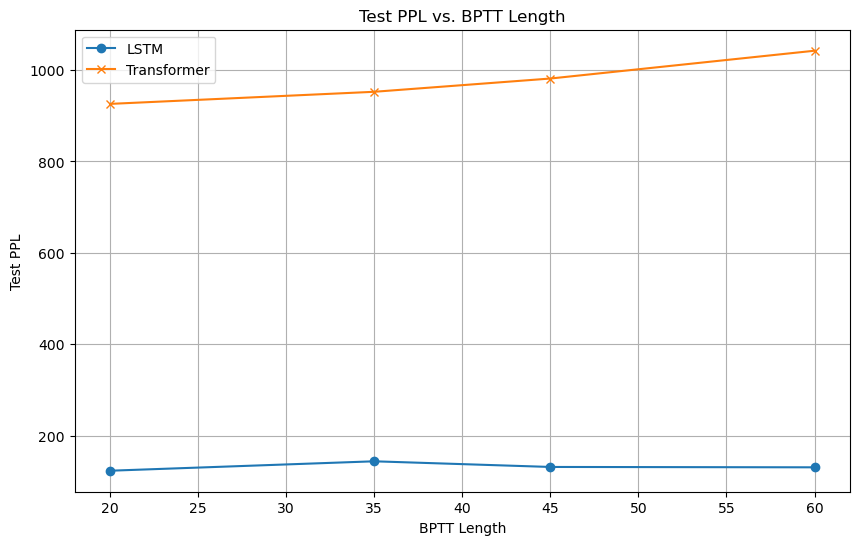

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(bptt_values, lstm_ppls, label='LSTM', marker='o')
plt.plot(bptt_values, transformer_ppls, label='Transformer', marker='x')
plt.xlabel('BPTT Length')
plt.ylabel('Test PPL')
plt.title('Test PPL vs. BPTT Length')
plt.legend()
plt.grid(True)
plt.show()

Based on the provided description and considering the typical behavior of LSTM and Transformer models, the plot suggests the following:

1. **LSTM Model Performance**:
   - The LSTM model demonstrates significantly lower test Perplexity (PPL) compared to the Transformer across all BPTT lengths.
   - There is a slight decrease in PPL for the LSTM model as the BPTT length increases from 35 to 45, indicating that a minimal sequence length is crucial for the LSTM to effectively capture dependencies in the data.
   - The LSTM PPL remains relatively stable with a slight uptick at a BPTT of 35. This could be due to the LSTM starting to hit the limits of its gradient propagation capabilities, or it could be an anomaly in the data or model training at this specific BPTT length.
   - Beyond BPTT 35, the LSTM PPL decreases again and stabilizes, suggesting that the model benefits from the ability to consider longer sequences up to a certain point, which likely corresponds to the average dependency length in the dataset.

2. **Transformer Model Performance**:
   - The Transformer model starts with a higher PPL at a BPTT length of 20 and shows a gradual increase as BPTT length increases.
   - The increasing trend of the Transformer PPL may indicate that the model does not benefit from longer sequence lengths in the same way as the LSTM. This could be due to the full-sequence attention mechanism of the Transformer, which considers all positions simultaneously, making it less sensitive to the specific BPTT setting.

3. **Comparison Between Models**:
   - The LSTM model outperforms the Transformer model in this specific test PPL evaluation across all BPTT lengths. This could suggest that for the task and dataset at hand, the LSTM model's ability to capture sequential information is more advantageous than the Transformer's attention mechanism.
   - It's also possible that the Transformer model may not be optimally configured or trained for the given task, which could contribute to its relatively poorer performance.

4. **Model Selection and BPTT Length**:
   - The choice of model and the optimal BPTT length are closely intertwined with the nature of the task and the dataset. The LSTM's performance suggests that there is a significant sequential aspect to the data that is captured effectively with a moderate BPTT length.
   - For the Transformer model, the consistent increase in PPL with longer BPTT lengths could suggest a lower BPTT is more effective. However other parameters need to be visited to make the conclusion. 
